In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/bank.xlsx')

# EDA and preprocessing

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.shape

(4521, 17)

  There are 4521 rows and 17 coulmns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


1. there are 9 categorical values and 7 numarical values
2. y is a target variable with yes or no value

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


there are no null values

In [ ]:

cor=df.corr(numeric_only=True)

<Axes: >

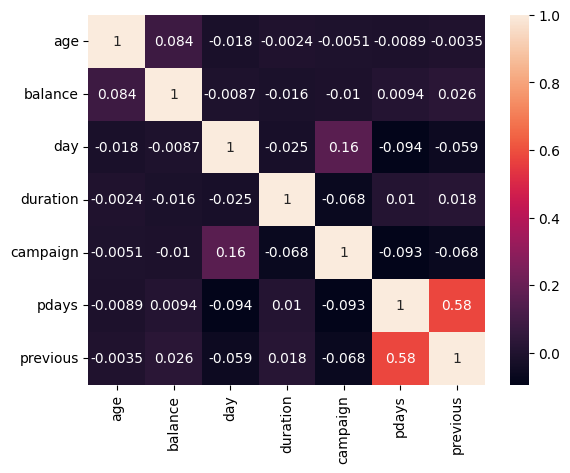

In [ ]:
sns.heatmap(cor,annot=True,)

there are no high corelations

<ipython-input-22-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

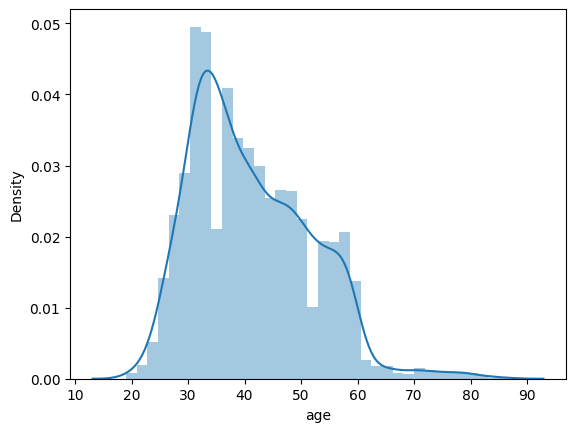

In [ ]:
sns.distplot(df['age'])

majority of people are between 25 to 50 age group

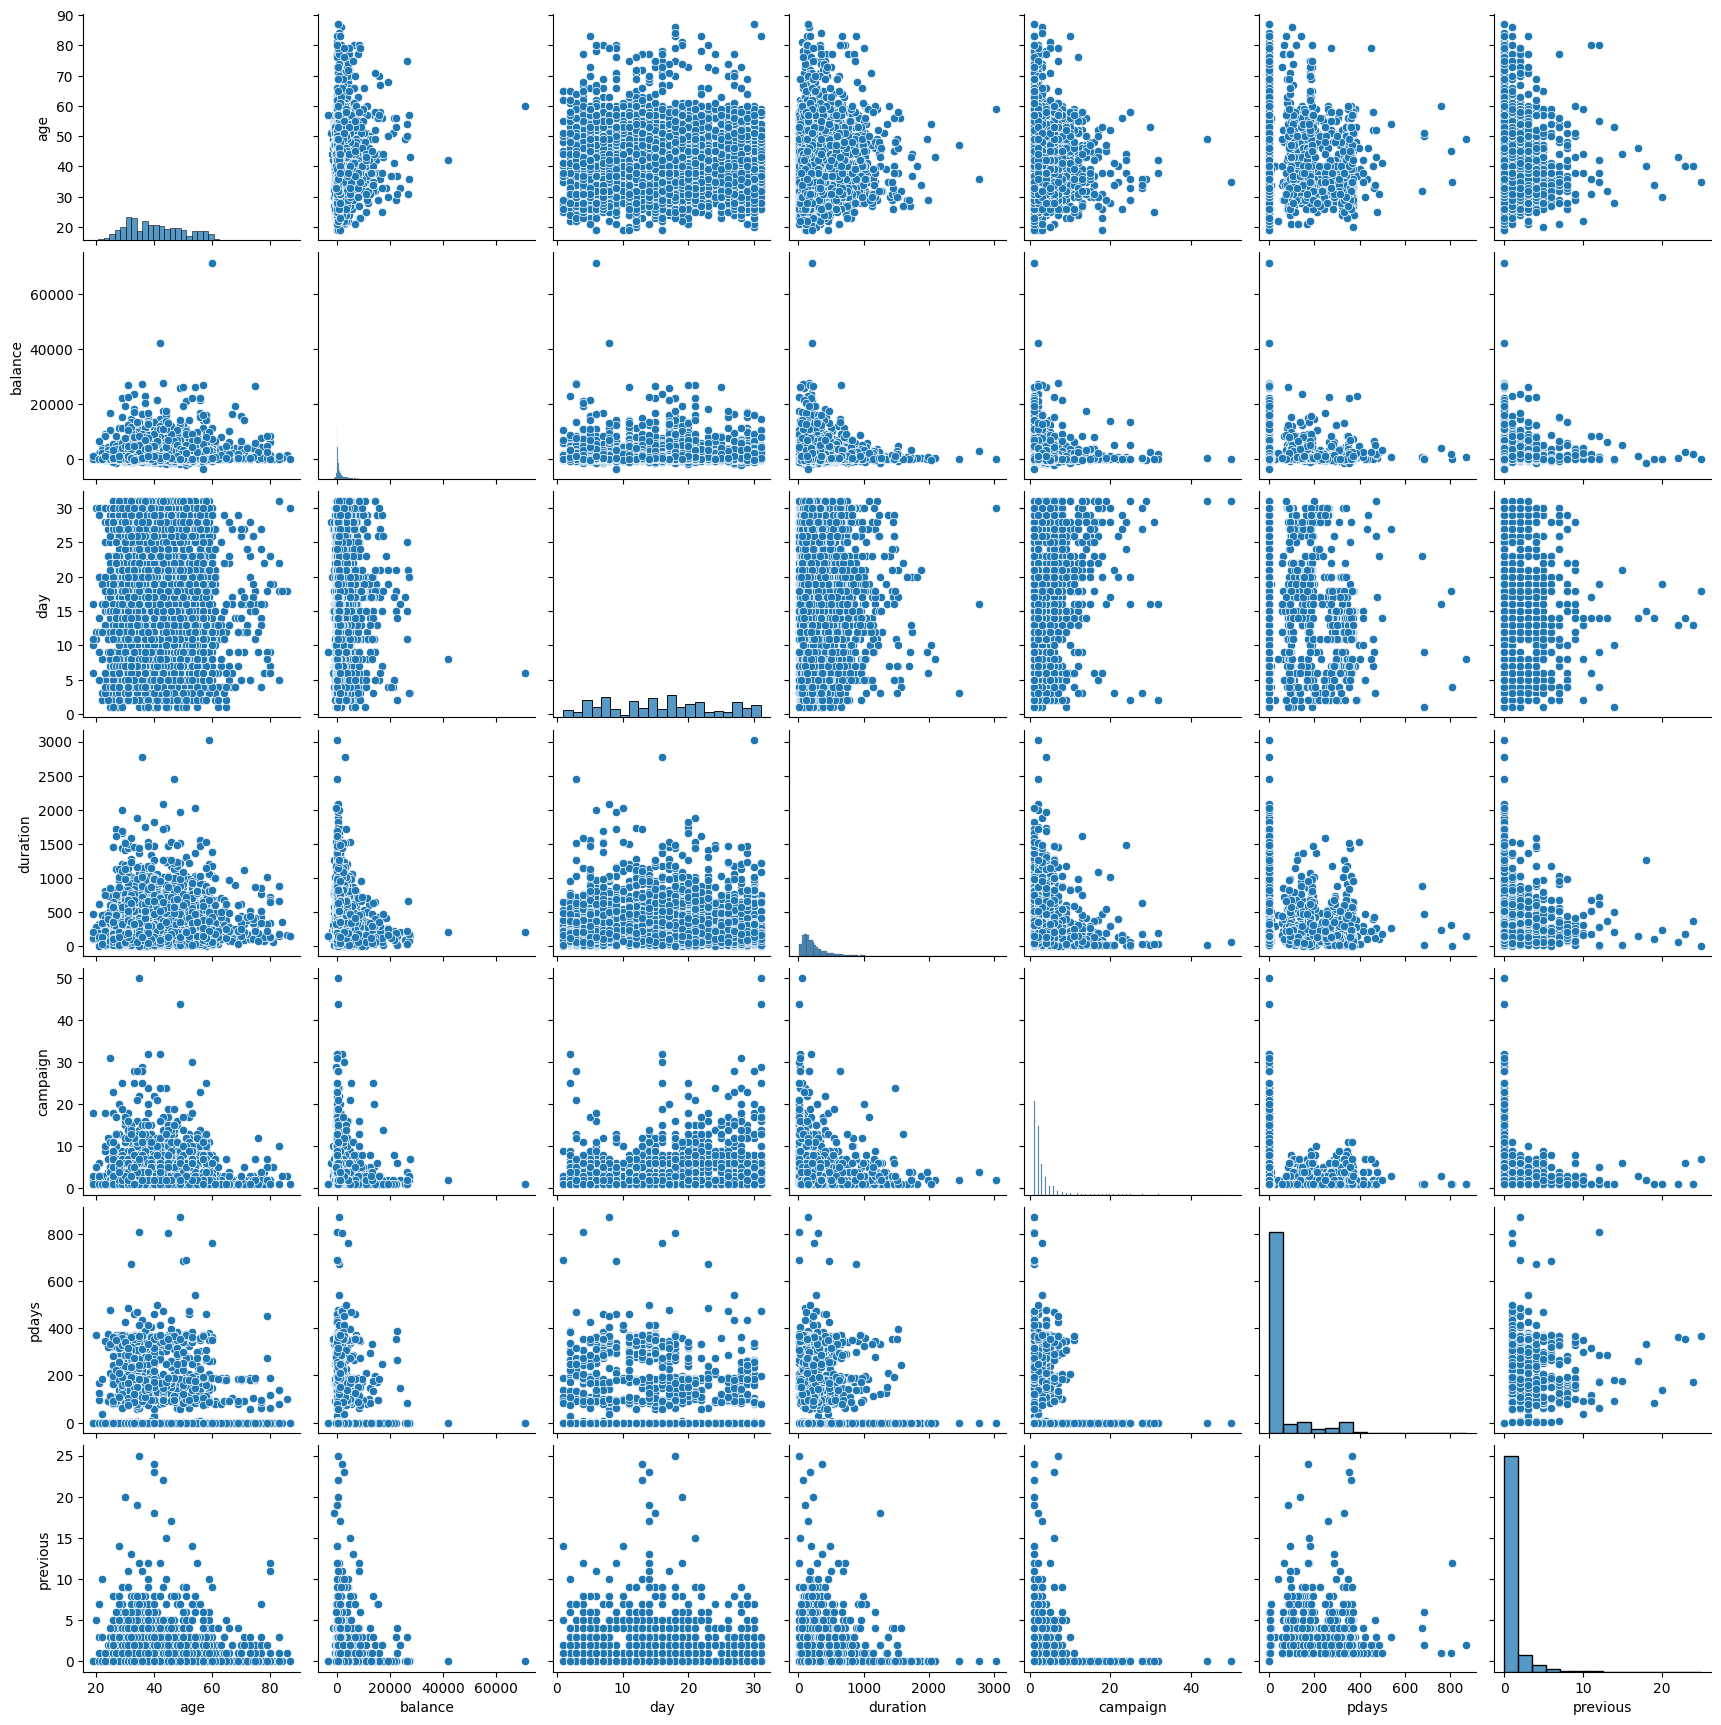

In [ ]:
sns.pairplot(df)

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


<Axes: ylabel='age'>

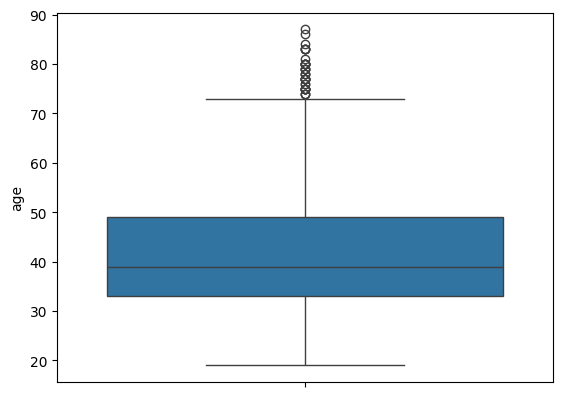

In [ ]:
sns.boxplot(df['age'])

In [ ]:
df[df['age']>75].count()

,0
age,29
job,29
marital,29
education,29
default,29
balance,29
housing,29
loan,29
contact,29
day,29


there are 29 outliers in age

<Axes: ylabel='balance'>

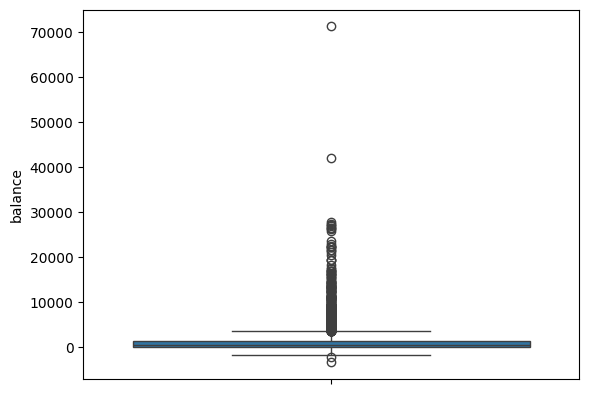

In [ ]:
sns.boxplot(df['balance'])

there are many outliers in balance

<Axes: ylabel='day'>

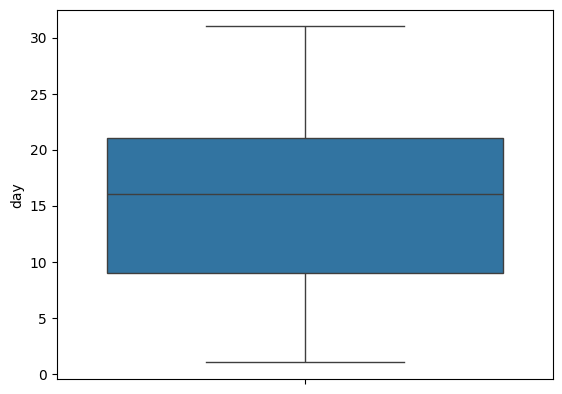

In [ ]:
sns.boxplot(df['day'])

there are no outlier in this data and data is in normal range

<Axes: ylabel='duration'>

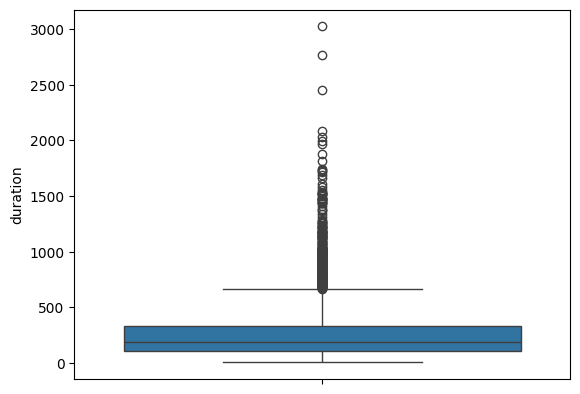

In [ ]:
sns.boxplot(df['duration'])

duration is in seconds so we will convert it

In [ ]:
df['duration']=df['duration']/60

<Axes: ylabel='duration'>

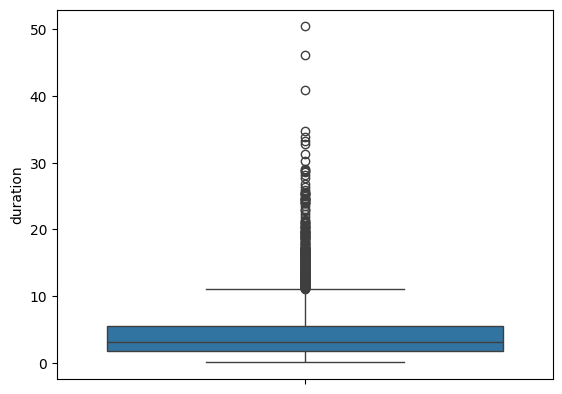

In [ ]:
sns.boxplot(df['duration'])

there are many outliers in this data

<Axes: ylabel='campaign'>

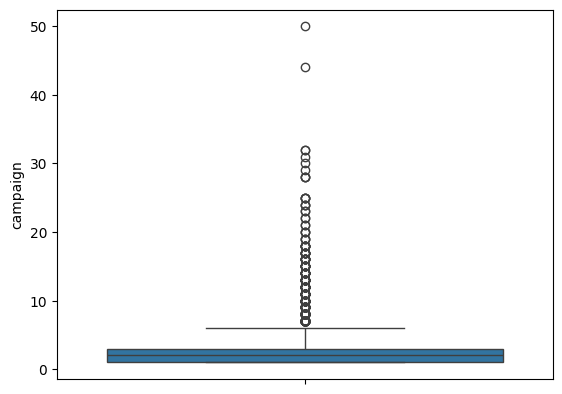

In [ ]:
sns.boxplot(df['campaign'])

campaign has many outliers

<Axes: ylabel='pdays'>

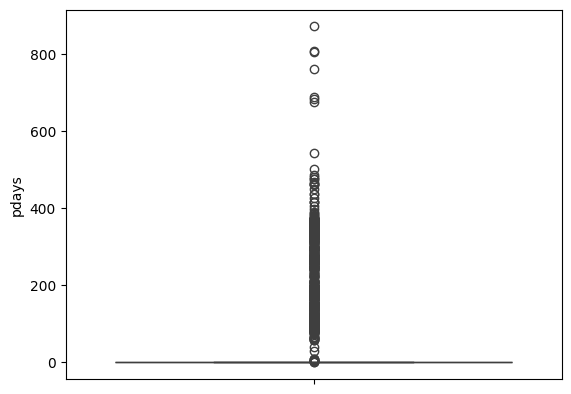

In [ ]:
sns.boxplot(df['pdays'])

pdays has many outliers and its not much important so we will drop it

In [ ]:
df.drop('pdays',axis=1,inplace=True)

<Axes: ylabel='previous'>

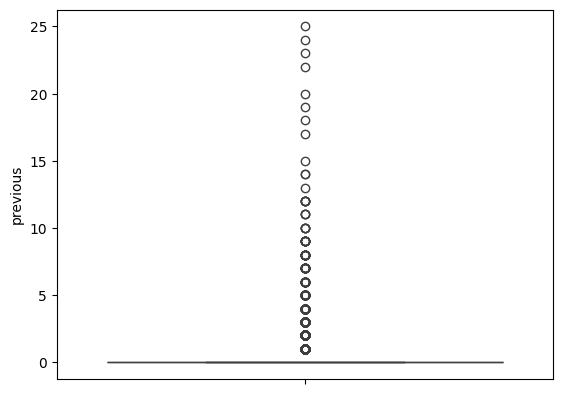

In [ ]:
sns.boxplot(df['previous'])

In [ ]:
df[df['previous']==0].count()

,0
age,3705
job,3705
marital,3705
education,3705
default,3705
balance,3705
housing,3705
loan,3705
contact,3705
day,3705


3705 bank has never contected

In [ ]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1.316667,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,3.666667,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,3.083333,1,1,failure,no


<Axes: xlabel='count', ylabel='job'>

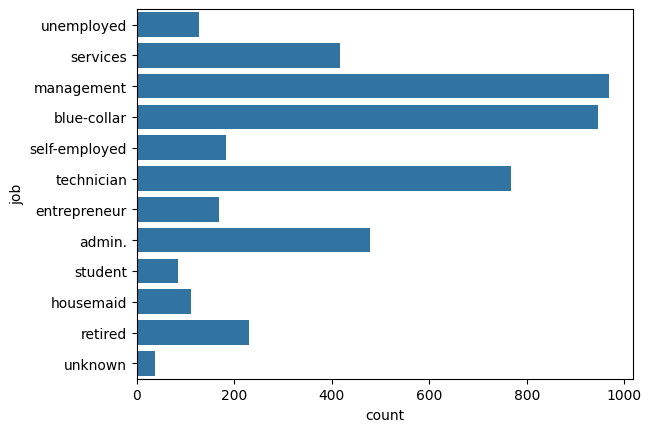

In [ ]:
sns.countplot(df['job'])

In [ ]:
df['job'].value_counts()

,count
job,
management,969
blue-collar,946
technician,768
admin.,478
services,417
retired,230
self-employed,183
entrepreneur,168
unemployed,128


1. management has the highest job count
2. there are 38 people whos job is unknown
3. 128 people are unemployed

<Axes: xlabel='count', ylabel='marital'>

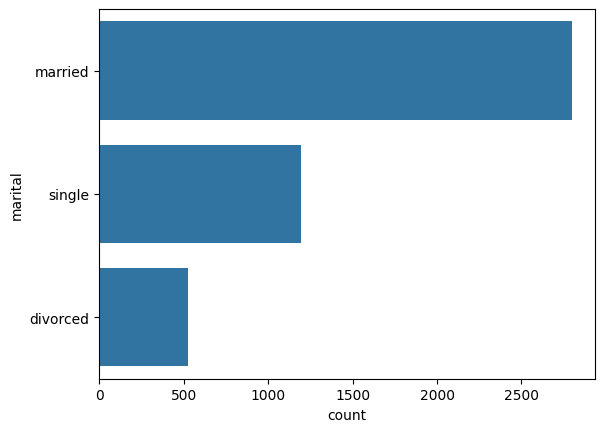

In [ ]:
sns.countplot(df['marital'])

In [ ]:
df['marital'].value_counts()

,count
marital,
married,2797
single,1196
divorced,528


1. there are 2797 married peoples
2. there are 1196 single peoples
3. there are 528 divorced people

<Axes: xlabel='count', ylabel='education'>

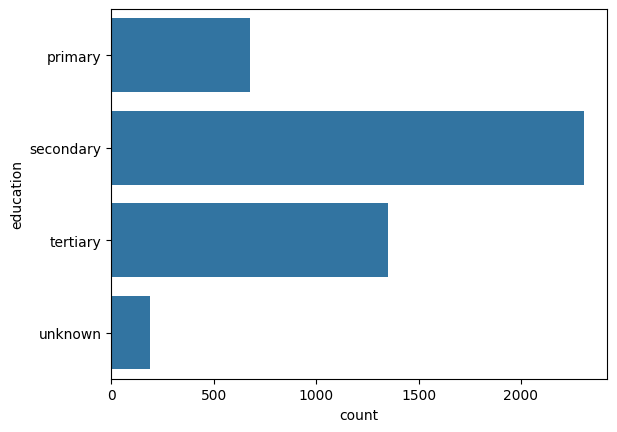

In [ ]:
sns.countplot(df['education'])

In [ ]:
df['education'].value_counts()

,count
education,
secondary,2306
tertiary,1350
primary,678
unknown,187


majority of customer are secondry pass

<Axes: xlabel='count', ylabel='default'>

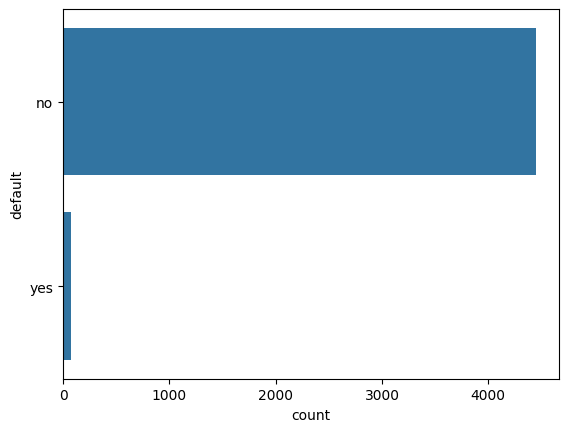

In [ ]:
sns.countplot(df['default'])

In [ ]:
df['default'].value_counts()

,count
default,
no,4445
yes,76


all customer are non defualt

<Axes: xlabel='count', ylabel='housing'>

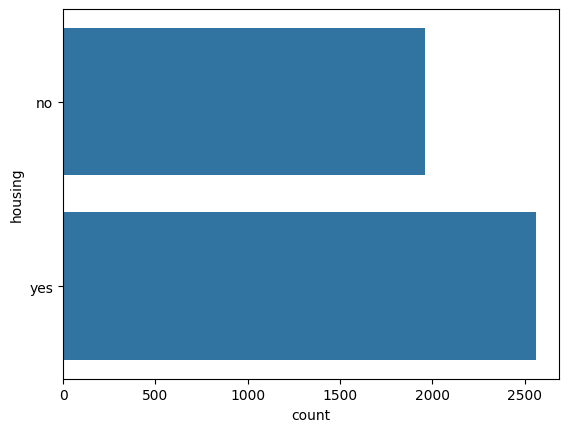

In [ ]:
sns.countplot(df['housing'])

In [ ]:
df['housing'].value_counts()

,count
housing,
yes,2559
no,1962


more then 50% have taken home loan

<Axes: xlabel='count', ylabel='loan'>

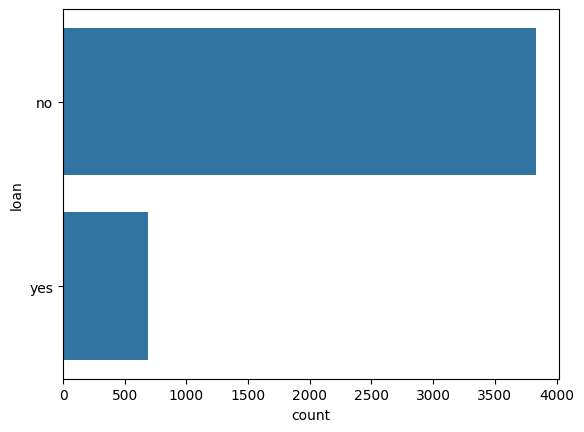

In [ ]:
sns.countplot(df['loan'])

In [ ]:
df['loan'].value_counts()

,count
loan,
no,3830
yes,691


majority of customer have not taken personal loan

<Axes: xlabel='count', ylabel='contact'>

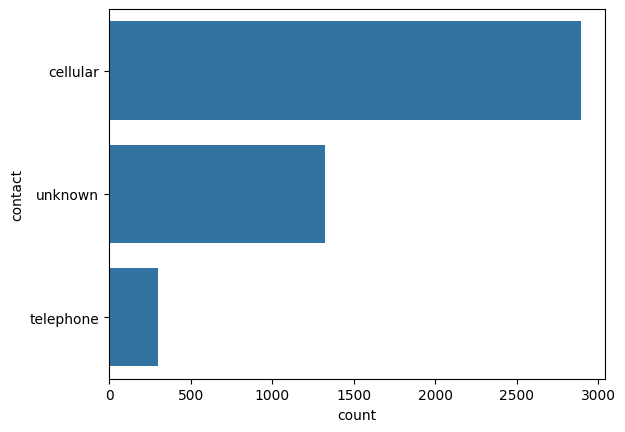

In [ ]:
sns.countplot(df['contact'])

In [ ]:
df['contact'].value_counts()

,count
contact,
cellular,2896
unknown,1324
telephone,301


majority of customer were contected through cellular

<Axes: xlabel='count', ylabel='month'>

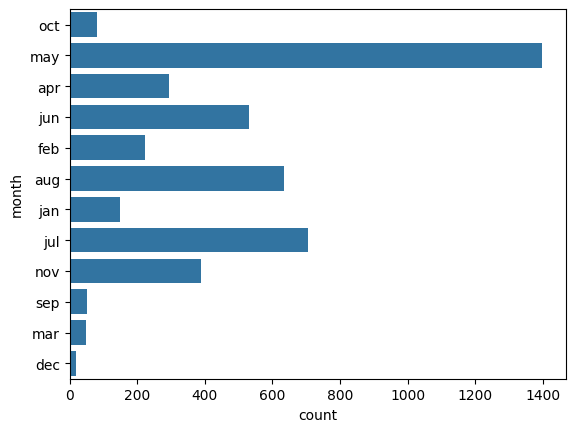

In [ ]:
sns.countplot(df['month'])

In [ ]:
df['month'].value_counts()

,count
month,
may,1398
jul,706
aug,633
jun,531
nov,389
apr,293
feb,222
jan,148
oct,80


<Axes: xlabel='count', ylabel='poutcome'>

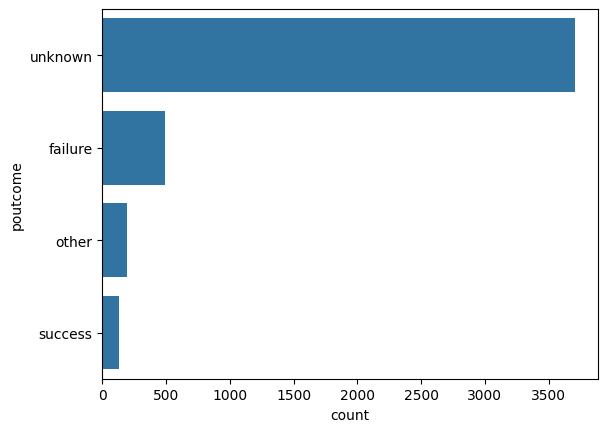

In [ ]:
sns.countplot(df['poutcome'])

In [ ]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,3705
failure,490
other,197
success,129


majority call status is unknown

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
cols=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [ ]:
for col in cols:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [ ]:
df.dtypes

,0
age,int64
job,int64
marital,int64
education,int64
default,int64
balance,int64
housing,int64
loan,int64
contact,int64
day,int64


# train the model

In [ ]:
x= df.drop('y',axis=1)
y=df['y']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# model selection

1. Random Forest: Great for handling a variety of data types and avoiding overfitting while providing strong performance on structured data.

2. XGBoost: Best when you need high performance, speed, and efficiency for large datasets or competitions, especially for tabular data.

3. Gradient Boosting: Ideal when you need strong predictive power and have time for tuning, as it can outperform other models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# random forest

In [ ]:
RF=RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150], 'bootstrap':[True,False]}

In [ ]:
gsc = GridSearchCV(estimator=RF,
                   param_grid = param_grid,
                   scoring = 'accuracy')

In [ ]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
gsc.best_estimator_.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=50)

In [ ]:
y_pred=gsc.best_estimator_.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1334
           1       0.55      0.27      0.36       158

    accuracy                           0.90      1492
   macro avg       0.74      0.62      0.65      1492
weighted avg       0.88      0.90      0.88      1492



#xgb

In [ ]:
xgb=XGBClassifier()

In [ ]:
param={ 'learning_rate':[0.15,0.20,0.25,0.30],
        'max_depth':[3,4,5],
        'min_child_weight':[1,3,5,7],
        'n_estimators':[50,100,120]
          }

In [ ]:
gsc = GridSearchCV(estimator=xgb,
                   param_grid = param_grid,
                   scoring = 'accuracy')

In [ ]:
gsc.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap" } are not used.

  warnings.warn

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
gsc.best_estimator_.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:39:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred=gsc.best_estimator_.predict(x_test)

In [ ]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1334
           1       0.55      0.41      0.47       158

    accuracy                           0.90      1492
   macro avg       0.74      0.68      0.71      1492
weighted avg       0.89      0.90      0.89      1492



# gradient boosting

In [ ]:
GB=GradientBoostingClassifier()

In [ ]:
param_grid={
    'learning_rate':[0.15,0.20,0.25,0.30],
    'n_estimators':[50,100,120]
}

In [ ]:
gsc=GridSearchCV(estimator=GB,
                 param_grid=param_grid,
                 scoring='accuracy')

In [ ]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [50, 100, 120]},
             scoring='accuracy')

In [ ]:
gsc.best_estimator_.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, n_estimators=50)

In [ ]:
y_pred=gsc.best_estimator_.predict(x_test)

In [ ]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1334
           1       0.56      0.28      0.37       158

    accuracy                           0.90      1492
   macro avg       0.74      0.63      0.66      1492
weighted avg       0.88      0.90      0.89      1492



among the three algorithm we used all three give same accuracy score